In [15]:
## Programming Question 1

import tensorflow as tf
import tensorflow_datasets as tfds

(ds_train, ds_test), ds_info = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:]'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)


In [20]:
# Normalize pixel values function
def normalize_img(image, label):
    image = tf.image.resize(image, (126, 126))
    image = tf.cast(image, tf.float32) / 255.0  # Normalize to [0,1]
    return image, label

# Apply normalization
train_ds = ds_train.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
test_ds = ds_test.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)

# Prepare batches
BATCH_SIZE = 32
train_ds = train_ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [21]:
from tensorflow.keras import layers, models

model = models.Sequential([
    # First convolutional block with fixed input dimensions
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(126, 126, 3), padding='same'),
    layers.MaxPooling2D((2, 2)),

    # Second convolutional block
    layers.Conv2D(64, (3, 3), activation='relu', padding='valid'),
    layers.MaxPooling2D((2, 2)),

    # Third convolutional block
    layers.Conv2D(128, (3, 3), activation='relu', padding='valid'),
    layers.MaxPooling2D((2, 2)),

    # Flatten and dense layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax')
])



In [22]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [23]:
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=test_ds
)

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 16s 106ms/step - accuracy: 0.3123 - loss: 1.5174 - val_accuracy: 0.5559 - val_loss: 1.1399
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 12s 64ms/step - accuracy: 0.5122 - loss: 1.1722 - val_accuracy: 0.6063 - val_loss: 0.9914
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.6031 - loss: 1.0004 - val_accuracy: 0.6567 - val_loss: 0.9097
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.6636 - loss: 0.8945 - val_accuracy: 0.6499 - val_loss: 0.8569
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.7155 - loss: 0.7609 - val_accuracy: 0.6839 - val_loss: 0.8213
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.7414 - loss: 0.6654 - val_accuracy: 0.6785 - val_loss: 0.8369
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - accuracy: 0.7823 - loss: 0.5771 - val_accuracy: 0.6717 - val_loss: 0.8856
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.8149 - loss: 0.4921 - val_accuracy: 0.6594 

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

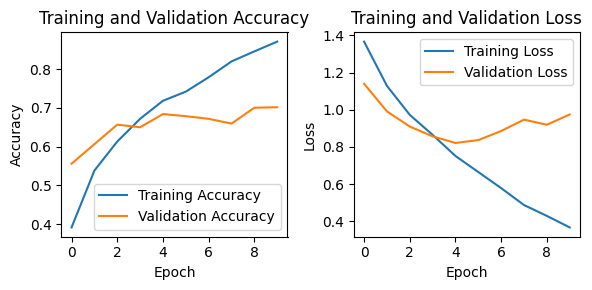

In [30]:
plt.figure(figsize=(6, 3))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.84      0.72     

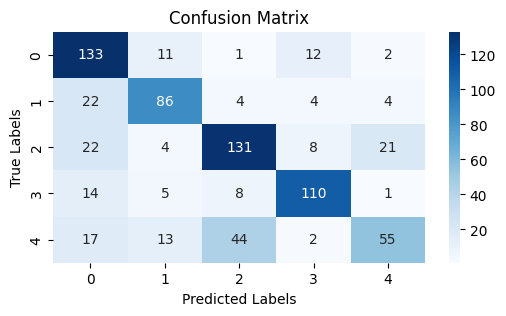

In [32]:
# Create arrays to store predictions and true labels
all_predictions = []
all_labels = []

# Get predictions for each batch in the test dataset
for images, labels in test_ds:
    predictions = model.predict(images)
    pred_classes = np.argmax(predictions, axis=1)
    all_predictions.extend(pred_classes)
    all_labels.extend(labels.numpy())

# Convert to numpy arrays
all_predictions = np.array(all_predictions)
all_labels = np.array(all_labels)

# Generate the classification report
print("Classification Report:")
print(classification_report(all_labels, all_predictions))

# Generate the confusion matrix
cm = confusion_matrix(all_labels, all_predictions)

# Plot the confusion matrix
plt.figure(figsize=(6, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [33]:
## Programming Question 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the dataset
df = pd.read_csv('A6.csv')

# Extract closing prices
closing_prices = df['Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(closing_prices)

# Create sequences of 60 days as input and next day as target
sequence_length = 60
X = []
y = []
for i in range(sequence_length, len(scaled_prices)):
    X.append(scaled_prices[i-sequence_length:i, 0])
    y.append(scaled_prices[i, 0])

X = np.array(X)
y = np.array(y)

# Reshape X to match LSTM input format: [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))


In [34]:
# Split the data into training and testing sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)


In [35]:
# Build the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(60, 1)),  # First LSTM layer
    LSTM(50),                                              # Second LSTM layer
    Dense(25),                                             # Dense layer with 25 neurons
    Dense(1)                                               # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [36]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)


Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0106 - val_loss: 0.0019
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 3.0311e-04 - val_loss: 0.0018
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.2738e-04 - val_loss: 0.0023
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3.0179e-04 - val_loss: 0.0026
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.6442e-04 - val_loss: 0.0019
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.1749e-04 - val_loss: 0.0013
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.7546e-04 - val_loss: 0.0015
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.4761e-04 - val_loss: 0.0016
Epoch 9/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.3943e-04 - val_loss: 0.0013
Epoch 10/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 3.5836e-04 - val_loss: 0.0016
Epoch 11/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.6064e-04 - val_loss: 0.0012
Epoch 12/20
49/49 ━━━━━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


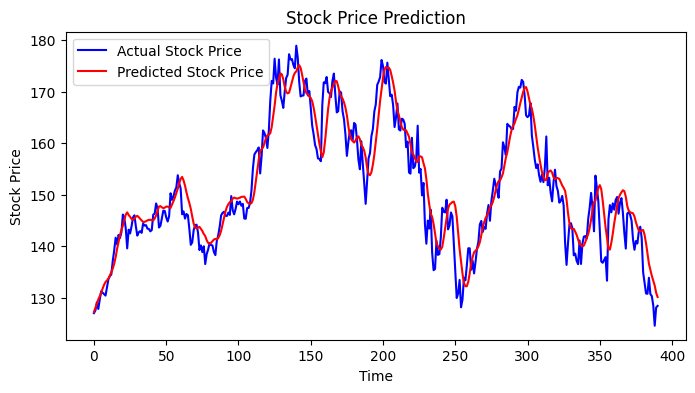

Mean Squared Error: 19.5659


In [39]:
# Make predictions on test data
predictions = model.predict(X_test)

# Inverse transform predictions and actual values back to original scale
predicted_prices = scaler.inverse_transform(predictions)
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(8, 4))
plt.plot(actual_prices, color='blue', label='Actual Stock Price')
plt.plot(predicted_prices, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Calculate Mean Squared Error (MSE)
mse = np.mean((predicted_prices - actual_prices)**2)
print(f'Mean Squared Error: {mse:.4f}')
